<a href="https://colab.research.google.com/github/n-jagadeep/assignment_7/blob/main/assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.) Here is the modified code with changes

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one-hot encode outputs
#num_classes = 10  # Since CIFAR-10 has 10 classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
#num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.01
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False)  # Remove decay parameter
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


170498071/170498071 [==============================] - 4s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

2.) Pridicting the first 4 values and comparing the results

In [6]:


# Predict the first 4 test samples
num_samples_to_predict = 4
predictions = model.predict(X_test[:num_samples_to_predict])

# Convert predictions to class labels (assuming one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

# Convert actual labels to class labels (assuming one-hot encoding)
actual_labels = np.argmax(y_test[:num_samples_to_predict], axis=1)

# Print the predicted and actual labels
print("Predicted Labels:", predicted_labels)
print("Actual Labels:", actual_labels)

# Compare and print the results
for i in range(num_samples_to_predict):
    if predicted_labels[i] == actual_labels[i]:
        print(f"Image {i+1}: Correctly Predicted (Class {predicted_labels[i]})")
    else:
        print(f"Image {i+1}: Incorrectly Predicted (Predicted Class {predicted_labels[i]}, Actual Class {actual_labels[i]})")


1/1 [==============================] - 0s 20ms/step
Predicted Labels: [3 8 8 8]
Actual Labels: [3 8 8 0]
Image 1: Correctly Predicted (Class 3)
Image 2: Correctly Predicted (Class 8)
Image 3: Correctly Predicted (Class 8)
Image 4: Incorrectly Predicted (Predicted Class 8, Actual Class 0)


3.) Ploting the values

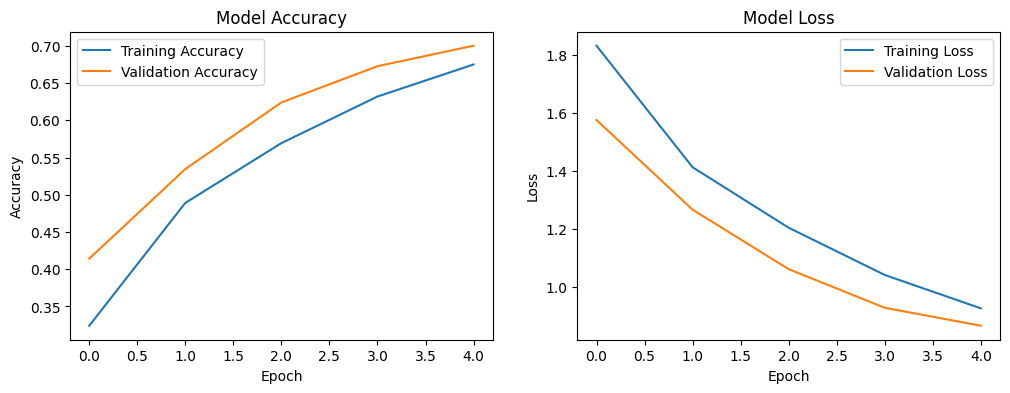

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
